# Code to mount Google Drive

In [ ]:
# mount google drive to colab
from google.colab import drive
import os

n = 140
drive.mount('/content/drive')
print("#" * n)

# change working directory
print("### colabs default working directory")

print("###\n### path: {}".format(os.getcwd()))
print("#" * n)
print("### setted working directory")

%cd drive/Shareddrives/MADS_Milestone2/


print("###\n### {}".format(os.getcwd()))
print("#" * n)

Mounted at /content/drive
############################################################################################################################################
### colabs default working directory
###
### path: /content
############################################################################################################################################
### setted working directory
/content/drive/Shareddrives/MADS_Milestone2
###
### /content/drive/Shareddrives/MADS_Milestone2
############################################################################################################################################


# Import libraries

In [ ]:
from platform import python_version
import sys
import pandas as pd
import numpy as np
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt

print("used python version {}".format(python_version()))

used python version 3.7.12


## play a bit with the DisGeNet (disease associated genes) API 

In [ ]:
'''
Script example to use the DisGeNET REST API with the new authentication system
'''

#For this example we are going to use the python default http library
import requests
import pandas as pd

#Build a dict with the following format, change the value of the two keys your DisGeNET account credentials, if you don't have an account you can create one here https://www.disgenet.org/signup/ 
auth_params = {"email":"brunosa@umich.edu","password":"herten!?"}

api_host = "https://www.disgenet.org/api"

api_key = None
s = requests.Session()
try:
    r = s.post(api_host+'/auth/', data=auth_params)
    if(r.status_code == 200):
        #Lets store the api key in a new variable and use it again in new requests
        json_response = r.json()
        api_key = json_response.get("token")
        print(api_key + "This is your user API key.") #Comment this line if you don't want your API key to show up in the terminal
    else:
        print(r.status_code)
        print(r.text)
except requests.exceptions.RequestException as req_ex:
    print(req_ex)
    print("Something went wrong with the request.")

if api_key:
    #Add the api key to the requests headers of the requests Session object in order to use the restricted endpoints.
    s.headers.update({"Authorization": "Bearer %s" % api_key}) 
#     #Lets get all the diseases associated to a gene eg. APP (EntrezID 351) and restricted by a source.
#     gda_response = s.get(api_host+'/gda/gene/351', params={'source':'UNIPROT'})
#     print(gda_response.json())
    #Lets get all the diseases associated to a gene eg. APP (EntrezID 351) and restricted by a source.
    dda_response = s.get(api_host+'/dda/genes/disease/C0042900', params={'source':'ALL', "limit": 20}) # --> C0042900 = Vitiligo
#     dda_response = s.get(api_host+'/dda/genes/disease/C0011615', params={'source':'ALL'})
#     print(dda_response.json())
    dda = pd.DataFrame.from_dict(dda_response.json())
    

if s:
    s.close()
    
dda

565518e79dc49cf7d0da7a91f061dec5624848a2This is your user API key.


,disease1_name,disease2_name,disease1_ngenes,disease2_ngenes,disease1_disease_class,disease2_disease_class,disease1_disease_class_name,disease2_disease_class_name,jaccard_genes,pvalue_jaccard_genes,source,ngenes1,ngenes2,ngenes,nvariants1,nvariants2,diseaseid1,diseaseid2
0,Vitiligo,VITILIGO-ASSOCIATED MULTIPLE AUTOIMMUNE DISEAS...,395,302,C17,C17,Skin and Connective Tissue Diseases,Skin and Connective Tissue Diseases,0.764556962025316,None,ALL,395,302,302,249,92,C0042900,C1847835
1,Vitiligo,Graves Disease,395,585,C17,C11;C20;C19,Skin and Connective Tissue Diseases,Eye Diseases; Immune System Diseases; ...,0.16945107398568,None,ALL,395,585,142,249,352,C0042900,C0018213
2,Vitiligo,Myasthenia Gravis,395,336,C17,C04;C20;C10,Skin and Connective Tissue Diseases,Neoplasms; Immune System Diseases; Ne...,0.158478605388273,None,ALL,395,336,100,249,93,C0042900,C0026896
3,Vitiligo,Sarcoidosis,395,413,C17,C15,Skin and Connective Tissue Diseases,Hemic and Lymphatic Diseases,0.157593123209169,None,ALL,395,413,110,249,787,C0042900,C0036202
4,Vitiligo,Juvenile rheumatoid arthritis,395,183,C17,C17;C05;C20,Skin and Connective Tissue Diseases,Skin and Connective Tissue Diseases; Mus...,0.156,None,ALL,395,183,78,249,10,C0042900,C3714757
5,Vitiligo,Hashimoto Disease,395,335,C17,C19,Skin and Connective Tissue Diseases,Endocrine System Diseases,0.151419558359621,None,ALL,395,335,96,249,131,C0042900,C0677607
6,Vitiligo,Skin lesion,395,563,C17,C17,Skin and Connective Tissue Diseases,Skin and Connective Tissue Diseases,0.150060024009604,None,ALL,395,563,125,249,52,C0042900,C0037284
7,Vitiligo,Dermatitis,395,496,C17,C17,Skin and Connective Tissue Diseases,Skin and Connective Tissue Diseases,0.149677419354839,None,ALL,395,496,116,249,16,C0042900,C0011603
8,Vitiligo,Inflammatory dermatosis,395,382,C17,C17,Skin and Connective Tissue Diseases,Skin and Connective Tissue Diseases,0.147710487444609,None,ALL,395,382,100,0,0,C0042900,C3875321
9,Vitiligo,Uveitis,395,247,C17,C11,Skin and Connective Tissue Diseases,Eye Diseases,0.146428571428571,None,ALL,395,247,82,0,0,C0042900,C0042164


# Download the data from DisGeNet
- curated gene - disease associations
- curated variant - disease associations (less important - just for follow ups)
- curated disease - disease associations (also not ofrealy interest -However could be useful once the network is created)

In [ ]:
!wget --directory-prefix=/content/drive/Shareddrives/MADS_Milestone2/dat/ https://ClinicalTrials.gov/AllAPIJSON.zip

--2021-11-11 21:19:39--  https://clinicaltrials.gov/AllAPIJSON.zip
Resolving clinicaltrials.gov (clinicaltrials.gov)... 130.14.29.113, 165.112.7.20, 2607:f220:41e:4290::113, ...
Connecting to clinicaltrials.gov (clinicaltrials.gov)|130.14.29.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2087580674 (1.9G) [application/zip]
Saving to: ‘/content/drive/Shareddrives/MADS_Milestone2/dat/AllAPIJSON.zip’

AllAPIJSON.zip      100%[===================>]   1.94G  9.95MB/s    in 5m 21s  

2021-11-11 21:25:01 (6.20 MB/s) - ‘/content/drive/Shareddrives/MADS_Milestone2/dat/AllAPIJSON.zip’ saved [2087580674/2087580674]



In [ ]:
!wget --directory-prefix=/content/drive/Shareddrives/MADS_Milestone2/dat/ https://www.disgenet.org/static/disgenet_ap1/files/downloads/curated_gene_disease_associations.tsv.gz
!wget --directory-prefix=/content/drive/Shareddrives/MADS_Milestone2/dat/ https://www.disgenet.org/static/disgenet_ap1/files/downloads/curated_variant_disease_associations.tsv.gz
!wget --directory-prefix=/content/drive/Shareddrives/MADS_Milestone2/dat/ https://www.disgenet.org/static/disgenet_ap1/files/downloads/disease_to_disease_CURATED.tsv.gz


--2021-10-27 19:02:44--  https://www.disgenet.org/static/disgenet_ap1/files/downloads/curated_gene_disease_associations.tsv.gz
Resolving www.disgenet.org (www.disgenet.org)... 84.89.134.141
Connecting to www.disgenet.org (www.disgenet.org)|84.89.134.141|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1674155 (1.6M) [application/x-gzip]
Saving to: ‘/content/drive/Shareddrives/MADS_Milestone2/dat/curated_gene_disease_associations.tsv.gz.1’

curated_gene_diseas 100%[===================>]   1.60M  2.00MB/s    in 0.8s    

2021-10-27 19:02:45 (2.00 MB/s) - ‘/content/drive/Shareddrives/MADS_Milestone2/dat/curated_gene_disease_associations.tsv.gz.1’ saved [1674155/1674155]

--2021-10-27 19:02:45--  https://www.disgenet.org/static/disgenet_ap1/files/downloads/curated_variant_disease_associations.tsv.gz
Resolving www.disgenet.org (www.disgenet.org)... 84.89.134.141
Connecting to www.disgenet.org (www.disgenet.org)|84.89.134.141|:443... connected.
HTTP request sent, awa

## considerations/thoughts/problems
- should we avoid circularity in the analysis by removing disease–protein associations marked as therapeutic?
- should we exclude all disease–protein associations that are inferred, based on orthology relationships from animal models, or based on computational-mining of the literature - to remove some low confident proteins (noise?) --> thats what i did here - i considered only protein-disease associations which draws from expert-curated repositories such as UNIPROT, CGI, ClinGen, Genomics England, CTD (human subset), PsyGeNET, and Orphanet
- should we filter disease–protein relationships to only consider proteins whose protein products were present in the network of physical interactions between proteins? 


import all DisGeNet files

In [ ]:
# current working directory
DIR = "/content/drive/Shareddrives/MADS_Milestone2/"

# get all the file names of data
files = os.listdir(DIR+"/dat")

print("#"*140, "\n### ", files)

###########################################
# define abbreviations of diferent datasets
# c_  = curated
# gda = gene - disease association
# vda = variant - disease association
# dda= disease - disease association
###########################################

names = ["c_gda", "c_vda", "c_dda"]

DF = {n :pd.read_csv("{}/dat/{}".format(DIR, f), compression='gzip',  sep='\t') for f,n in zip(files,names) if ".gz" in f}
DF

############################################################################################################################################ 
###  ['curated_gene_disease_associations.tsv.gz', 'curated_variant_disease_associations.tsv.gz', 'disease_to_disease_CURATED.tsv.gz', '9606.protein.links.full.v11.5.txt.gz', '9606.protein.physical.links.full.v11.5.txt.gz', '9606.protein.info.v11.5.txt.gz', 'go-basic.obo', 'go-basic.obo.1', '.ipynb_checkpoints', 'BIOGRID-ALL-4.4.202.tab3.zip', 'CHEMDBL_exploration', 'molecule', 'mechanismOfAction', 'indication', 'fda', 'dfs']


{'c_dda':         diseaseId2  ...                   diseaseId2_name
 0         C0000731  ...                 Abdomen distended
 1         C0000731  ...                 Abdomen distended
 2         C0000731  ...                 Abdomen distended
 3         C0000731  ...                 Abdomen distended
 4         C0000731  ...                 Abdomen distended
 ...            ...  ...                               ...
 1819919   C4757950  ...  Isolated ATP synthase deficiency
 1819920   C4757950  ...  Isolated ATP synthase deficiency
 1819921   C4757950  ...  Isolated ATP synthase deficiency
 1819922   C4757950  ...  Isolated ATP synthase deficiency
 1819923   C4757950  ...  Isolated ATP synthase deficiency
 
 [1819924 rows x 15 columns],
 'c_gda':           geneId geneSymbol    DSI  ...  NofPmids NofSnps     source
 0              1       A1BG  0.700  ...         1       0  CTD_human
 1              1       A1BG  0.700  ...         1       0  CTD_human
 2              2        A2M  0.

In [ ]:
DF["c_gda"].diseaseId.value_counts()

C0006142    1074
C0036341     883
C0023893     774
C0009402     702
C0376358     616
            ... 
C0015704       1
C3280501       1
C4225281       1
C3151081       1
C0006840       1
Name: diseaseId, Length: 11181, dtype: int64

In [ ]:
# ind = [True if ("C17" in str(i).split(";")) | ("C20" in str(i).split(";"))  else False for i in DF["c_gda"].diseaseClass]#.value_counts() #.isin(["C17", "C20", "C17,C20", "C20,C17"])].value_counts("diseaseClass")

# DF["c_gda"][ind]
DF["c_gda"]["node1_type"] = "disease_related_protein"
df = DF["c_gda"].loc[:,["geneId", "diseaseId", "geneSymbol",  "diseaseName", "node1_type" ,"diseaseType", "diseaseClass"]
                ].rename(columns={"geneId":"node1", "diseaseId": "node2", "geneSymbol": "node1_name",  "diseaseName": "node2_name",
                                  "diseaseType": "node2_type"}).copy()
df[df.node2_type == "disease"].to_csv("res/final_disease_protein_interaction_network.csv")




In [ ]:
df = df[df.node2_type == "disease"]

# consider only diseases from class C17 (skin) or C20 (immune)
ind = [True if ("C17" in str(i).split(";")) | ("C20" in str(i).split(";"))  else False for i in df.diseaseClass]
df[ind].value_counts("node2_name").to_dict()

{'Malignant neoplasm of breast': 1074,
 'Breast Carcinoma': 538,
 'Mammary Carcinoma, Human': 525,
 'Mammary Neoplasms, Human': 525,
 'Rheumatoid Arthritis': 174,
 'Juvenile-Onset Still Disease': 135,
 'Polyarthritis, Juvenile, Rheumatoid Factor Negative': 131,
 'Juvenile psoriatic arthritis': 131,
 'Polyarthritis, Juvenile, Rheumatoid Factor Positive': 131,
 'Juvenile arthritis': 131,
 'HIV Coinfection': 103,
 'Asthma': 80,
 'Lupus Erythematosus, Systemic': 71,
 'Contact Dermatitis': 71,
 'Dermatitis, Allergic Contact': 67,
 'Precursor Cell Lymphoblastic Leukemia Lymphoma': 61,
 'Malignant neoplasm of skin': 59,
 'Libman-Sacks Disease': 58,
 'Pustulosis of Palms and Soles': 57,
 'Psoriasis': 57,
 'Diffuse Large B-Cell Lymphoma': 55,
 'Chronic Lymphocytic Leukemia': 55,
 'Precursor T-Cell Lymphoblastic Leukemia-Lymphoma': 53,
 'Childhood Acute Lymphoblastic Leukemia': 52,
 'L2 Acute Lymphoblastic Leukemia': 50,
 'Multiple Sclerosis': 45,
 'Multiple Sclerosis, Acute Fulminating': 45,
 '

# First try to generate a network of disease genes (specific diseases)

In [ ]:
# specifiy disease of interest - serves as lookup to convert disease id with disease abrebiations
disease = {"AD": "C0011615", "Pso": "C0033860", "RA": "C0003873", "IBD": "C0010346", "Vitiligo": "C0042900", "Asthma": "C0004096", "AA": "C0002171", "HS": "C0162836"}

# generate an empty dataframe / Graph as container/placeholder
df = pd.DataFrame()
G = nx.Graph()

# loop through all diseases to get the nodes
for k,v in disease.items():
    if v not in set(DF["c_gda"].diseaseId):
        print({k:v})
    tmp = DF["c_gda"][DF["c_gda"].diseaseId == v]
    tmp["disease"] = k
    df = pd.concat([df, tmp])

# insert all edges into the empty graph with selected attributes
G = nx.from_pandas_edgelist(df, 'geneSymbol', 'disease', 
                            edge_attr=['score', 'EI', 'YearInitial', 'YearFinal', 'NofPmids', 'NofSnps', 'source'])

# define node attributes
g_attrs = {r[1]["geneSymbol"]: {"color": "red",
                                   "shape": "o",
                               "entrezID": r[1]["geneId"],
                               "DSI":  r[1]["DSI"],
                              "DPI":r[1]["DPI"],
                              } for r in df.iterrows()}

d_attrs = {r[1]["disease"]: {"color": "red",
                                   "shape": "^",
                               "diseaseId": r[1]["diseaseId"], 
                              'diseaseName': r[1]["diseaseName"],
                              "diseaseType": r[1]["diseaseType"],
                              "diseaseClass": r[1]["diseaseClass"],
                              "diseaseSemanticType": r[1]["diseaseSemanticType"],
                              "DSI":  r[1]["DSI"],
                              "DPI":r[1]["DPI"]
                              } for r in df.iterrows()}

attrs = dict(list(g_attrs.items()) + list(d_attrs.items()))

# insert all node attributes
nx.set_node_attributes(G, attrs)
                                                                         

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


# draw the first network

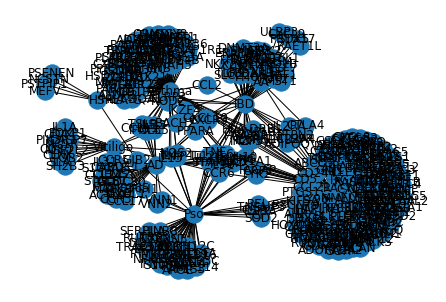

In [ ]:
nx.draw(G, with_labels=True)
plt.show()

In [ ]:
gda = DF["c_gda"].loc[:,["geneId", "diseaseId"]]

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,source
0,1,A1BG,0.700,0.538,C0019209,Hepatomegaly,phenotype,C23;C06,Finding,0.30,1.000,2017.0,2017.0,1,0,CTD_human
1,1,A1BG,0.700,0.538,C0036341,Schizophrenia,disease,F03,Mental or Behavioral Dysfunction,0.30,1.000,2015.0,2015.0,1,0,CTD_human
2,2,A2M,0.529,0.769,C0002395,Alzheimer's Disease,disease,C10;F03,Disease or Syndrome,0.50,0.769,1998.0,2018.0,3,0,CTD_human
3,2,A2M,0.529,0.769,C0007102,Malignant tumor of colon,disease,C06;C04,Neoplastic Process,0.31,1.000,2004.0,2019.0,1,0,CTD_human
4,2,A2M,0.529,0.769,C0009375,Colonic Neoplasms,group,C06;C04,Neoplastic Process,0.30,1.000,2004.0,2004.0,1,0,CTD_human
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84033,109580095,HBB-LCR,0.743,0.115,C0002875,Cooley's anemia,disease,C16;C15,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,CTD_human
84034,109580095,HBB-LCR,0.743,0.115,C0005283,beta Thalassemia,disease,C16;C15,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,CTD_human
84035,109580095,HBB-LCR,0.743,0.115,C0019025,Hemoglobin F Disease,disease,C16;C15,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,CTD_human
84036,109580095,HBB-LCR,0.743,0.115,C0085578,Thalassemia Minor,disease,C16;C15,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,CTD_human


In [ ]:
sorted(nx.betweenness_centrality(G, normalized=True).items(),key=lambda x: x[1])
       

[('CCR3', 0.0),
 ('CCR5', 0.0),
 ('FLG', 0.0),
 ('GLB1', 0.0),
 ('OVOL1', 0.0),
 ('MAPK8', 0.0),
 ('S100A8', 0.0),
 ('CCL17', 0.0),
 ('CCL22', 0.0),
 ('CCL24', 0.0),
 ('SELE', 0.0),
 ('STAT6', 0.0),
 ('ZNF365', 0.0),
 ('EMSY', 0.0),
 ('CARD11', 0.0),
 ('CCDC80', 0.0),
 ('ACTL9', 0.0),
 ('IL31', 0.0),
 ('APOE', 0.0),
 ('RUNX3', 0.0),
 ('HLA-C', 0.0),
 ('MKI67', 0.0),
 ('NFKBIA', 0.0),
 ('PCNA', 0.0),
 ('SERPINB8', 0.0),
 ('REN', 0.0),
 ('S100A7', 0.0),
 ('TGFA', 0.0),
 ('TP53', 0.0),
 ('PTTG1', 0.0),
 ('CARM1', 0.0),
 ('TRAF3IP2', 0.0),
 ('DDX58', 0.0),
 ('IL36RN', 0.0),
 ('CYP2S1', 0.0),
 ('ERAP1', 0.0),
 ('FBXL19', 0.0),
 ('VNN3', 0.0),
 ('RNF114', 0.0),
 ('CSMD1', 0.0),
 ('CARD14', 0.0),
 ('LCE3D', 0.0),
 ('ZC3H12C', 0.0),
 ('ZNF816', 0.0),
 ('AP1S3', 0.0),
 ('IFNLR1', 0.0),
 ('HCAR2', 0.0),
 ('LCE3B', 0.0),
 ('LCE3C', 0.0),
 ('ADORA2A', 0.0),
 ('GRK2', 0.0),
 ('ACAN', 0.0),
 ('AGER', 0.0),
 ('AHR', 0.0),
 ('ANXA3', 0.0),
 ('FASLG', 0.0),
 ('STS', 0.0),
 ('ATIC', 0.0),
 ('BCL2A1', 0.

In [ ]:
sorted(dict(G.degree).items(), key=lambda x: x[1])

[('CCR3', 1),
 ('CCR5', 1),
 ('FLG', 1),
 ('GLB1', 1),
 ('OVOL1', 1),
 ('MAPK8', 1),
 ('S100A8', 1),
 ('CCL17', 1),
 ('CCL22', 1),
 ('CCL24', 1),
 ('SELE', 1),
 ('STAT6', 1),
 ('ZNF365', 1),
 ('EMSY', 1),
 ('CARD11', 1),
 ('CCDC80', 1),
 ('ACTL9', 1),
 ('IL31', 1),
 ('APOE', 1),
 ('RUNX3', 1),
 ('HLA-C', 1),
 ('MKI67', 1),
 ('NFKBIA', 1),
 ('PCNA', 1),
 ('SERPINB8', 1),
 ('REN', 1),
 ('S100A7', 1),
 ('TGFA', 1),
 ('TP53', 1),
 ('PTTG1', 1),
 ('CARM1', 1),
 ('TRAF3IP2', 1),
 ('DDX58', 1),
 ('IL36RN', 1),
 ('CYP2S1', 1),
 ('ERAP1', 1),
 ('FBXL19', 1),
 ('VNN3', 1),
 ('RNF114', 1),
 ('CSMD1', 1),
 ('CARD14', 1),
 ('LCE3D', 1),
 ('ZC3H12C', 1),
 ('ZNF816', 1),
 ('AP1S3', 1),
 ('IFNLR1', 1),
 ('HCAR2', 1),
 ('LCE3B', 1),
 ('LCE3C', 1),
 ('ADORA2A', 1),
 ('GRK2', 1),
 ('ACAN', 1),
 ('AGER', 1),
 ('AHR', 1),
 ('ANXA3', 1),
 ('FASLG', 1),
 ('STS', 1),
 ('ATIC', 1),
 ('BCL2A1', 1),
 ('BDKRB2', 1),
 ('BGN', 1),
 ('PRDM1', 1),
 ('BLK', 1),
 ('BMP4', 1),
 ('BMP6', 1),
 ('CALD1', 1),
 ('CAV2', 1),


In [ ]:
G = nx.Graph()


for k,v in disease.items():
    tmp = DF["c_gda"][DF["c_gda"].diseaseId == v]
    
    genes = [(r[1]["geneSymbol"], {"color": "red",
                                   "shape": "o",
                               "entrezID": r[1]["geneId"],
                               "source": r[1]["source"],
                               "score": r[1]["score"]}) for r in tmp.iterrows()]
    
    genes_un = [(r[1]["geneSymbol"], {"color": "blue",
                                      "shape": "o",
                               "entrezID": r[1]["geneId"],
                               "source": r[1]["source"],
                               "score": r[1]["score"]}) for r in tmp.iterrows() if r[1]["geneSymbol"] not in list(G.nodes())]
    
#     genes_un = [(g, {"color": "blue"}) for g in tmp.geneSymbol.tolist() if g not in list(G.nodes())]
    dis   = (k, {"color": "red",
                "shape": "^",})
    G.add_nodes_from(genes_un + [dis])
#     print([(g, k) for g in genes[0]])
    G.add_edges_from([(g[0], k) for g in genes])


# try different plotting styles 

focus on just a subgraph (all AD associated genes)

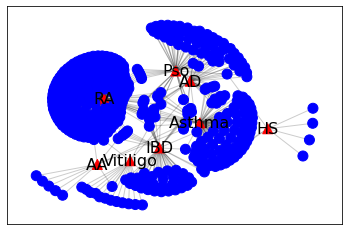

In [ ]:
colors=nx.get_node_attributes(G,'color')

pos = nx.kamada_kawai_layout(G)

nx.draw_networkx_edges(G, pos, alpha=0.2)
nx.draw_networkx_nodes(G, pos, nodelist=[k for k in colors.keys() if k in list(disease.keys())], 
                       node_color=[v for k,v in colors.items() if k in list(disease.keys())], node_shape="^",
                            node_size=100)

nx.draw_networkx_nodes(G, pos, nodelist=[k for k in colors.keys() if k not in list(disease.keys())], 
                        node_color=[v for k,v in colors.items() if k not in list(disease.keys())], node_shape= "o",
                            node_size=100)
nx.draw_networkx_labels(G, pos, {k:k for k in disease.keys()}, font_size=16, font_color='black')

# nx.draw_kamada_kawai(G, with_labels=True, font_weight='bold')
plt.show()

consider only one disease with its disease associated genes and look what other diseases share the same disease associated genes

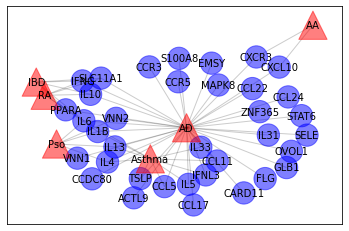

In [ ]:
dis_view = ["AD", "Pso", "IBD", "RA", "Asthma", "AA"]
G_sub = G.subgraph(list(set(list(sum([(e,E) for e,E in list(G.edges()) if "AD" in (e,E)], ())))) + dis_view)
colors=nx.get_node_attributes(G_sub,'color')
shape=nx.get_node_attributes(G_sub,'shape')

pos = nx.spring_layout(G_sub)

nx.draw_networkx_edges(G_sub, pos, alpha=0.2)

nx.draw_networkx_nodes(G_sub, pos, alpha=0.5, nodelist=[k for k in colors.keys() if k not in dis_view ], node_shape="o",
                       node_color=[v for k,v in colors.items() if k not in dis_view], node_size=500)

nx.draw_networkx_nodes(G_sub, pos, alpha=0.5, nodelist=[k for k in colors.keys() if k in dis_view ], node_shape="^",
                       node_color=[v for k,v in colors.items() if k in dis_view], node_size=800)

nx.draw_networkx_labels(G_sub, pos, {k:k for k in list(G_sub.nodes) }, font_size=10, font_color='black')

# nx.draw_kamada_kawai(G, with_labels=True, font_weight='bold')
plt.show()

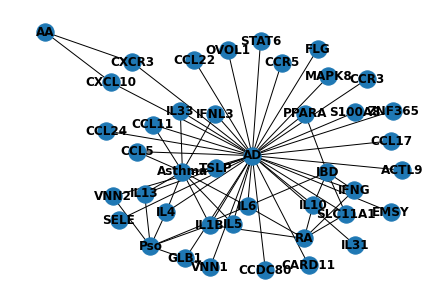

In [ ]:
# AD asscoiated genes which are mapped directly to Pso, RA and IBD associtated genes
nx.draw(G.subgraph(list(set(list(sum([(e,E) for e,E in list(G.edges()) if "AD" in (e,E)], ())))) + dis_view), with_labels=True, font_weight='bold')
plt.show()

In [ ]:
!ls 

CHEMDBL_exploration.ipynb  NCT0100xxxx	NCT0204xxxx  NCT0308xxxx  NCT0412xxxx
Contents.txt		   NCT0101xxxx	NCT0205xxxx  NCT0309xxxx  NCT0413xxxx
dat			   NCT0102xxxx	NCT0206xxxx  NCT0310xxxx  NCT0414xxxx
doc			   NCT0103xxxx	NCT0207xxxx  NCT0311xxxx  NCT0415xxxx
NCT0000xxxx		   NCT0104xxxx	NCT0208xxxx  NCT0312xxxx  NCT0416xxxx
NCT0001xxxx		   NCT0105xxxx	NCT0209xxxx  NCT0313xxxx  NCT0417xxxx
NCT0002xxxx		   NCT0106xxxx	NCT0210xxxx  NCT0314xxxx  NCT0418xxxx
NCT0003xxxx		   NCT0107xxxx	NCT0211xxxx  NCT0315xxxx  NCT0419xxxx
NCT0004xxxx		   NCT0108xxxx	NCT0212xxxx  NCT0316xxxx  NCT0420xxxx
NCT0005xxxx		   NCT0109xxxx	NCT0213xxxx  NCT0317xxxx  NCT0421xxxx
NCT0006xxxx		   NCT0110xxxx	NCT0214xxxx  NCT0318xxxx  NCT0422xxxx
NCT0007xxxx		   NCT0111xxxx	NCT0215xxxx  NCT0319xxxx  NCT0423xxxx
NCT0008xxxx		   NCT0112xxxx	NCT0216xxxx  NCT0320xxxx  NCT0424xxxx
NCT0009xxxx		   NCT0113xxxx	NCT0217xxxx  NCT0321xxxx  NCT0425xxxx
NCT0010xxxx		   NCT0114xxxx	NCT0218xxxx  NCT0322xxxx  NCT0426xxxx
NCT0011xxxx	

- should we remove disease–gene associations marked as therapeutic to prevent circularity in the analysis?
- should we filter disease–gene relationships to only consider genes whose protein products were present in the network of physical interactions between proteins?

# STRING DB


## Download physical protein protein interactions

In [ ]:
!wget --directory-prefix=/content/drive/Shareddrives/MADS_Milestone2/dat/ https://stringdb-static.org/download/protein.links.full.v11.5/9606.protein.links.full.v11.5.txt.gz
!wget --directory-prefix=/content/drive/Shareddrives/MADS_Milestone2/dat/ https://stringdb-static.org/download/protein.physical.links.full.v11.5/9606.protein.physical.links.full.v11.5.txt.gz
!wget --directory-prefix=/content/drive/Shareddrives/MADS_Milestone2/dat/ https://stringdb-static.org/download/protein.info.v11.5/9606.protein.info.v11.5.txt.gz


--2021-10-21 18:18:48--  https://stringdb-static.org/download/protein.info.v11.5/9606.protein.info.v11.5.txt.gz
Resolving stringdb-static.org (stringdb-static.org)... 151.106.34.104
Connecting to stringdb-static.org (stringdb-static.org)|151.106.34.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1901833 (1.8M) [application/octet-stream]
Saving to: ‘/content/drive/Shareddrives/MADS_Milestone2/dat/9606.protein.info.v11.5.txt.gz’

9606.protein.info.v 100%[===================>]   1.81M  2.71MB/s    in 0.7s    

2021-10-21 18:18:49 (2.71 MB/s) - ‘/content/drive/Shareddrives/MADS_Milestone2/dat/9606.protein.info.v11.5.txt.gz’ saved [1901833/1901833]



In [ ]:
info = pd.read_csv("dat/9606.protein.info.v11.5.txt.gz", compression='gzip', header=0, sep='\t', quotechar='"')

The keys (#string_protein_id) are enembl-protein ids instead of entrezID - we need to convert it to entrez id

In [ ]:
info

,#string_protein_id,preferred_name,protein_size,annotation
0,9606.ENSP00000000233,ARF5,180,ADP-ribosylation factor 5; GTP-binding protein...
1,9606.ENSP00000000412,M6PR,277,Cation-dependent mannose-6-phosphate receptor;...
2,9606.ENSP00000001008,FKBP4,459,Peptidyl-prolyl cis-trans isomerase FKBP4; Imm...
3,9606.ENSP00000001146,CYP26B1,512,Cytochrome P450 26B1; Involved in the metaboli...
4,9606.ENSP00000002125,NDUFAF7,441,"Protein arginine methyltransferase NDUFAF7, mi..."
...,...,...,...,...
19561,9606.ENSP00000485671,ENSG00000280273,120,HCG1991042
19562,9606.ENSP00000485672,ENSG00000279458,86,annotation not available
19563,9606.ENSP00000485673,ENSG00000279988,243,annotation not available
19564,9606.ENSP00000485675,ENSG00000280116,84,annotation not available


import the full network of protein protein interactions

In [ ]:
tmp = pd.read_csv("dat/9606.protein.links.full.v11.5.txt.gz", compression='gzip', header=0, sep=' ', quotechar='"')

In [ ]:
"There are {}Mio edges in the STRING DB".format(round(len(tmp) / 1000000, 1))

'There are 11.9Mio edges in the STRING DB'

import the dataset that is mentioned to contain only physical interactions - to see if we are missing something

In [ ]:
tmp = pd.read_csv("dat/9606.protein.physical.links.full.v11.5.txt.gz", compression='gzip', header=0, sep=' ', quotechar='"')

In [ ]:
"There are {}Mio edges in the STRING DBconsidering only phsical interactions".format(round(len(tmp) / 1000000, 1))

'There are 2.0Mio edges in the STRING DBconsidering only phsical interactions'

In [ ]:
# clean node ids remove the homo sapiens code id
p1 = tmp.protein1.str.split(".", expand=True)
p2 = tmp.protein2.str.split(".", expand=True)

new = p1.merge(p2, how="inner", left_index=True, right_index=True)


In [ ]:
# check if the interactions with IL13 are real physical interactions
# this example i looked at IL13 = ENSP00000304915 cytokine which should bind to IL4RA IL13RA1 IL13RA2
IL13 = tmp[new.isin(["ENSP00000304915"]).sum(axis=1).replace({1: True, 0: False})]
IL13[IL13.experiments > 0]

,protein1,protein2,homology,experiments,experiments_transferred,database,database_transferred,textmining,textmining_transferred,combined_score
624703,9606.ENSP00000304915,9606.ENSP00000360730,0,933,0,600,0,769,639,997
624709,9606.ENSP00000304915,9606.ENSP00000361004,0,933,86,800,0,663,642,998
624715,9606.ENSP00000304915,9606.ENSP00000457492,0,270,0,0,0,0,0,270
624723,9606.ENSP00000304915,9606.ENSP00000379111,0,892,0,600,0,881,0,994
1187335,9606.ENSP00000360730,9606.ENSP00000304915,0,933,0,600,0,769,639,997
1192711,9606.ENSP00000361004,9606.ENSP00000304915,0,933,86,800,0,663,642,998
1461493,9606.ENSP00000379111,9606.ENSP00000304915,0,892,0,600,0,881,0,994
1855362,9606.ENSP00000457492,9606.ENSP00000304915,0,270,0,0,0,0,0,270


I have learned something new. there is evidence that  ENSP00000457492 = TMEM219 dimerize with IL13RA2 and binds to IL13 but its not visible via STRINGDB gui what is going wrong here?

test another one - this time we look at at CXCL10 a chemokine  It seems it contains not only confident physical interactions -.-

In [ ]:
# check another one - if the interactions with CCL27 are real physical interactions
# this example i looked at CCL27 = ENSP00000219244 cytokine which should bind to CCR4 and CCR8
CCL27 = tmp[new.isin(["ENSP00000219244"]).sum(axis=1).replace({1: True, 0: False})]
CCL27[cxcl10.experiments > 0]

,protein1,protein2,homology,experiments,experiments_transferred,database,database_transferred,textmining,textmining_transferred,combined_score
60798,9606.ENSP00000219244,9606.ENSP00000259607,0,237,54,0,0,0,0,247
60799,9606.ENSP00000219244,9606.ENSP00000378365,0,237,0,0,0,0,0,237
60801,9606.ENSP00000219244,9606.ENSP00000294728,0,270,0,0,0,0,0,270
60803,9606.ENSP00000219244,9606.ENSP00000326432,0,463,0,0,0,706,0,835
60804,9606.ENSP00000219244,9606.ENSP00000375086,0,220,54,0,0,0,0,230
60805,9606.ENSP00000219244,9606.ENSP00000472467,0,237,0,0,0,77,0,265
60808,9606.ENSP00000219244,9606.ENSP00000332659,0,506,56,0,0,696,0,845
60811,9606.ENSP00000219244,9606.ENSP00000337065,0,237,0,0,0,0,0,237
60812,9606.ENSP00000219244,9606.ENSP00000292303,0,280,56,0,0,0,0,291
60813,9606.ENSP00000219244,9606.ENSP00000354416,0,273,0,0,0,0,0,273


## BioGrid 

In [ ]:
!wget --directory-prefix=/content/drive/Shareddrives/MADS_Milestone2/dat/ https://downloads.thebiogrid.org/File/BioGRID/Release-Archive/BIOGRID-4.4.202/BIOGRID-ALL-4.4.202.tab3.zip

--2021-10-21 18:05:28--  https://downloads.thebiogrid.org/File/BioGRID/Release-Archive/BIOGRID-4.4.202/BIOGRID-ALL-4.4.202.tab3.zip
Resolving downloads.thebiogrid.org (downloads.thebiogrid.org)... 173.255.198.187
Connecting to downloads.thebiogrid.org (downloads.thebiogrid.org)|173.255.198.187|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/content/drive/Shareddrives/MADS_Milestone2/dat/BIOGRID-ALL-4.4.202.tab3.zip’

BIOGRID-ALL-4.4.202     [ <=>                ]  12.32K  --.-KB/s    in 0.001s  

2021-10-21 18:05:28 (12.9 MB/s) - ‘/content/drive/Shareddrives/MADS_Milestone2/dat/BIOGRID-ALL-4.4.202.tab3.zip’ saved [12617]



In [ ]:
tmp = pd.read_csv("dat/BIOGRID-ALL-4.4.202.tab3.zip", compression='zip', header=0, sep='\t', quotechar='"')

BadZipFile: ignored

In [ ]:
pp = tmp[((tmp.loc[:,"Organism Name Interactor A"] == "Homo sapiens") & (tmp.loc[:,"Experimental System Type"] == "physical"))
        ].query('`Organism Name Interactor A` == `Organism Name Interactor B`')

In [ ]:
df = pd.DataFrame()
G2 = nx.Graph()

g_dis=nx.get_node_attributes(G,'entrezID')

indA = [v for k,v in g_dis.items() if v in pp.loc[:,"Entrez Gene Interactor A"].tolist()]
indB = [v for k,v in g_dis.items() if v in pp.loc[:,"Entrez Gene Interactor B"].tolist()]

part1 = pp.set_index("Entrez Gene Interactor A").loc[indA,:].reset_index()
part2 = pp.set_index("Entrez Gene Interactor B").loc[indB,:].reset_index()
protein = part1.append(part2)
protein["index"] = list(range(len(protein)+1,  len(protein)*2+1,1))
PRO = pd.concat([protein.loc[:,["Official Symbol Interactor A","Entrez Gene Interactor A"]].rename(columns={"Official Symbol Interactor A": "Official Symbol Interactor", 
                                                                                          "Entrez Gene Interactor A": "Entrez Gene Interactor"}), protein.loc[:,["Official Symbol Interactor B","Entrez Gene Interactor B", "index"]].set_index("index").rename(columns={"Official Symbol Interactor B": "Official Symbol Interactor", 
                                                                                          "Entrez Gene Interactor B": "Entrez Gene Interactor"})]
               ).drop_duplicates(subset=['Entrez Gene Interactor'])


    
G2 = nx.from_pandas_edgelist(PRO, 'geneSymbol', 'disease', 
                            edge_attr=['score', 'EI', 'YearInitial', 'YearFinal', 'NofPmids', 'NofSnps', 'source'])


                                                                         

NetworkXError: Invalid edge_attr argument: ['score', 'EI', 'YearInitial', 'YearFinal', 'NofPmids', 'NofSnps', 'source']

In [ ]:
protein

In [ ]:
g_dis=nx.get_node_attributes(G,'entrezID')

indA = [v for k,v in g_dis.items() if v in pp.loc[:,"Entrez Gene Interactor A"].tolist()]
indB = [v for k,v in g_dis.items() if v in pp.loc[:,"Entrez Gene Interactor B"].tolist()]

part1 = pp.set_index("Entrez Gene Interactor A").loc[indA,:].reset_index()
part2 = pp.set_index("Entrez Gene Interactor B").loc[indB,:].reset_index()
protein = part1.append(part2)
protein["index"] = list(range(len(protein)+1,  len(protein)*2+1,1))
PRO = pd.concat([protein.loc[:,["Official Symbol Interactor A","Entrez Gene Interactor A", "Systematic Name Interactor A", "Synonyms Interactor A", "SWISS-PROT Accessions Interactor A",
                              "TREMBL Accessions Interactor A", "REFSEQ Accessions Interactor A"]

                            ].rename(columns={"Official Symbol Interactor A": "Official Symbol Interactor",
                                              "Entrez Gene Interactor A": "Entrez Gene Interactor",
                                             "Systematic Name Interactor A": "Systematic Name Interactor",
                                             "Synonyms Interactor A": "Synonyms Interactor",
                                             "SWISS-PROT Accessions Interactor A": "SWISS-PROT Accessions Interactor", 
                                             "TREMBL Accessions Interactor A": "TREMBL Accessions Interactor",
                                             "REFSEQ Accessions Interactor A": "REFSEQ Accessions Interactor"}),

                 protein.loc[:,["Official Symbol Interactor B","Entrez Gene Interactor B", "index", "Systematic Name Interactor B", "Synonyms Interactor B", 
                                "SWISS-PROT Accessions Interactor B", "TREMBL Accessions Interactor B", "REFSEQ Accessions Interactor B"]
                            ].set_index("index").rename(columns={"Official Symbol Interactor B": "Official Symbol Interactor",
                                                                 "Entrez Gene Interactor B": "Entrez Gene Interactor",
                                                                 "Systematic Name Interactor B": "Systematic Name Interactor",
                                                                 "Synonyms Interactor B": "Synonyms Interactor",
                                                                 "SWISS-PROT Accessions Interactor B": "SWISS-PROT Accessions Interactor", 
                                                                 "TREMBL Accessions Interactor B": "TREMBL Accessions Interactor",
                                                                 "REFSEQ Accessions Interactor B": "REFSEQ Accessions Interactor"})]
               ).drop_duplicates(subset=['Entrez Gene Interactor'])


remove = list(nx.get_node_attributes(G, "entrezID"))
PRO = PRO[~PRO['Entrez Gene Interactor'].isin(remove)]
PRO["color"] = "blue"
PRO["shape"] = "o"


G2 = G.copy()
G2 = nx.from_pandas_edgelist(protein, "Official Symbol Interactor A", 'Official Symbol Interactor B', 
                            edge_attr=['#BioGRID Interaction ID', 'Experimental System Type', 'Author', 'Publication Source', 'Throughput',
       'Score', 'Modification', 'Qualifications', 'Tags', 'Source Database', 'Ontology Term IDs', 'Ontology Term Names', 'Ontology Term Categories',
       'Ontology Term Qualifier IDs', 'Ontology Term Qualifier Names',
       'Ontology Term Types'])


nx.set_node_attributes(G2, PRO.set_index('Official Symbol Interactor').to_dict())

print(len(G.nodes()))
G.add_nodes_from(G2)
G.add_edges_from(G2.edges())
len(G.nodes())



293


9387

In [ ]:
PRO = pd.concat([protein.loc[:,["Official Symbol Interactor A","Entrez Gene Interactor A", "Systematic Name Interactor A", "Synonyms Interactor A", "SWISS-PROT Accessions Interactor A",
                              "TREMBL Accessions Interactor A", "REFSEQ Accessions Interactor A"]

                            ].rename(columns={"Official Symbol Interactor A": "Official Symbol Interactor",
                                              "Entrez Gene Interactor A": "Entrez Gene Interactor",
                                             "Systematic Name Interactor A": "Systematic Name Interactor",
                                             "Synonyms Interactor A": "Synonyms Interactor",
                                             "SWISS-PROT Accessions Interactor A": "SWISS-PROT Accessions Interactor", 
                                             "TREMBL Accessions Interactor A": "TREMBL Accessions Interactor",
                                             "REFSEQ Accessions Interactor A": "REFSEQ Accessions Interactor"}),

                 protein.loc[:,["Official Symbol Interactor B","Entrez Gene Interactor B", "index", "Systematic Name Interactor B", "Synonyms Interactor B", 
                                "SWISS-PROT Accessions Interactor B", "TREMBL Accessions Interactor B", "REFSEQ Accessions Interactor B"]
                            ].set_index("index").rename(columns={"Official Symbol Interactor B": "Official Symbol Interactor",
                                                                 "Entrez Gene Interactor B": "Entrez Gene Interactor",
                                                                 "Systematic Name Interactor B": "Systematic Name Interactor",
                                                                 "Synonyms Interactor B": "Synonyms Interactor",
                                                                 "SWISS-PROT Accessions Interactor B": "SWISS-PROT Accessions Interactor", 
                                                                 "TREMBL Accessions Interactor B": "TREMBL Accessions Interactor",
                                                                 "REFSEQ Accessions Interactor B": "REFSEQ Accessions Interactor"})]
               ).drop_duplicates(subset=['Entrez Gene Interactor'])

# set(PRO.loc[:,"Official Symbol Interactor"].tolist()) 
PRO

,Official Symbol Interactor,Entrez Gene Interactor,Systematic Name Interactor,Synonyms Interactor,SWISS-PROT Accessions Interactor,TREMBL Accessions Interactor,REFSEQ Accessions Interactor
0,CCR3,1232,-,CC-CKR-3|CD193|CKR3|CMKBR3,P51677,A0A024R2Z3|Q8TDP5|Q8TDP4,NP_001828|NP_847898|NP_847899|NP_001158152
8,CCR5,1234,-,CC-CKR-5|CCCKR5|CCR-5|CD195|CKR-5|CKR5|CMKBR5|...,P51681,Q38L21,NP_000570|NP_001093638
20,FLG,2312,-,ATOD2,P20930,-,NP_002007
26,GLB1,2720,-,EBP|ELNR1|MPS4B,P16278,-,NP_001303969|NP_000395|NP_001073279|NP_001129074
45,CXCR3,2833,-,CD182|CD183|CKR-L2|CMKAR3|GPR9|IP10-R|Mig-R|MigR,P49682,-,NP_001136269|NP_001495
...,...,...,...,...,...,...,...
68093,PLD4,122618,UNQ2488/PRO5775,C14orf175,Q96BZ4,F5H2B5,NP_001295103|NP_620145
68367,FUT2,2524,-,B12QTL1|SE|SEC2|Se2|sej,Q10981,A8K2L2,NP_001091107|NP_000502
68777,MUC2,4583,-,MLP|MUC-2|SMUC,Q02817,-,NP_002448
69288,NKX2-3,159296,RP11-85A1.2,CSX3|NK2.3|NKX2.3|NKX2C|NKX4-3,Q8TAU0,-,NP_660328


In [ ]:
# remove = list(nx.get_node_attributes(G, "entrezID"))
# PRO[~PRO['Entrez Gene Interactor'].isin(remove)]

In [ ]:
# remove

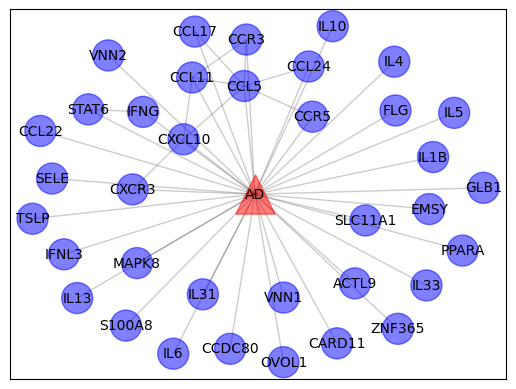

In [ ]:
dis_view = ["AD"]
G_sub = G.subgraph(list(set(list(sum([(e,E) for e,E in list(G.edges()) if "AD" in (e,E)], ())))) + dis_view)
colors=nx.get_node_attributes(G_sub,'color')
shape=nx.get_node_attributes(G_sub,'shape')

pos = nx.spring_layout(G_sub)

nx.draw_networkx_edges(G_sub, pos, alpha=0.2)

nx.draw_networkx_nodes(G_sub, pos, alpha=0.5, nodelist=[k for k in colors.keys() if k not in dis_view ], node_shape="o",
                       node_color=[v for k,v in colors.items() if k not in dis_view], node_size=500)

nx.draw_networkx_nodes(G_sub, pos, alpha=0.5, nodelist=[k for k in colors.keys() if k in dis_view ], node_shape="^",
                       node_color=[v for k,v in colors.items() if k in dis_view], node_size=800)

nx.draw_networkx_labels(G_sub, pos, {k:k for k in list(G_sub.nodes) }, font_size=10, font_color='black')

# nx.draw_kamada_kawai(G, with_labels=True, font_weight='bold')
plt.show()

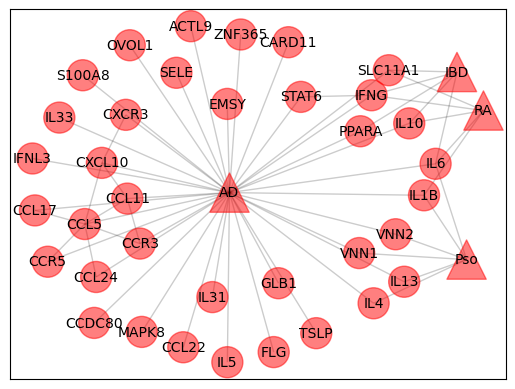

In [ ]:
dis_view = ["AD", "Pso", "IBD", "RA"]
G_sub = G.subgraph(list(set(list(sum([(e,E) for e,E in list(G.edges()) if "AD" in (e,E)], ())))) + dis_view)
colors=nx.get_node_attributes(G_sub,'color')
shape=nx.get_node_attributes(G_sub,'shape')

pos = nx.spring_layout(G_sub)

nx.draw_networkx_edges(G_sub, pos, alpha=0.2)

nx.draw_networkx_nodes(G_sub, pos, alpha=0.5, nodelist=[k for k in colors.keys() if k not in dis_view ], node_shape="o",
                       node_color=[v for k,v in colors.items() if k not in dis_view], node_size=500)

nx.draw_networkx_nodes(G_sub, pos, alpha=0.5, nodelist=[k for k in colors.keys() if k in dis_view ], node_shape="^",
                       node_color=[v for k,v in colors.items() if k in dis_view], node_size=800)

nx.draw_networkx_labels(G_sub, pos, {k:k for k in list(G_sub.nodes) }, font_size=10, font_color='black')

# nx.draw_kamada_kawai(G, with_labels=True, font_weight='bold')
plt.show()

In [ ]:
protein[protein.loc[:,"Official Symbol Interactor A" ]== "CXCL10"].loc[:,protein.columns[7:20]]


,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,Synonyms Interactor B,Experimental System,Experimental System Type,Author,Publication Source,Organism ID Interactor A,Organism ID Interactor B,Throughput,Score,Modification
142,CXCL10,CCL11,C7|IFI10|INP10|IP-10|SCYB10|crg-2|gIP-10|mob-1,SCYA11,Reconstituted Complex,physical,von Hundelshausen P (2017),PUBMED:28381538,9606,9606,High Throughput,0.551,-
143,CXCL10,CCL13,C7|IFI10|INP10|IP-10|SCYB10|crg-2|gIP-10|mob-1,CKb10|MCP-4|NCC-1|NCC1|SCYA13|SCYL1,Reconstituted Complex,physical,von Hundelshausen P (2017),PUBMED:28381538,9606,9606,High Throughput,0.343,-
144,CXCL10,CCL21,C7|IFI10|INP10|IP-10|SCYB10|crg-2|gIP-10|mob-1,6Ckine|CKb9|ECL|SCYA21|SLC|TCA4,Reconstituted Complex,physical,von Hundelshausen P (2017),PUBMED:28381538,9606,9606,High Throughput,0.182,-
145,CXCL10,CCL26,C7|IFI10|INP10|IP-10|SCYB10|crg-2|gIP-10|mob-1,IMAC|MIP-4a|MIP-4alpha|SCYA26|TSC-1,Reconstituted Complex,physical,von Hundelshausen P (2017),PUBMED:28381538,9606,9606,High Throughput,0.096,-
146,CXCL10,CCL28,C7|IFI10|INP10|IP-10|SCYB10|crg-2|gIP-10|mob-1,CCK1|MEC|SCYA28,Reconstituted Complex,physical,von Hundelshausen P (2017),PUBMED:28381538,9606,9606,High Throughput,0.221,-
147,CXCL10,CCL5,C7|IFI10|INP10|IP-10|SCYB10|crg-2|gIP-10|mob-1,D17S136E|RANTES|SCYA5|SIS-delta|SISd|TCP228|eoCP,Reconstituted Complex,physical,von Hundelshausen P (2017),PUBMED:28381538,9606,9606,High Throughput,0.101,-
148,CXCL10,CCL8,C7|IFI10|INP10|IP-10|SCYB10|crg-2|gIP-10|mob-1,HC14|MCP-2|MCP2|SCYA10|SCYA8,Reconstituted Complex,physical,von Hundelshausen P (2017),PUBMED:28381538,9606,9606,High Throughput,0.184,-
149,CXCL10,CXCL11,C7|IFI10|INP10|IP-10|SCYB10|crg-2|gIP-10|mob-1,H174|I-TAC|IP-9|IP9|SCYB11|SCYB9B|b-R1,Reconstituted Complex,physical,von Hundelshausen P (2017),PUBMED:28381538,9606,9606,High Throughput,0.168,-
150,CXCL10,CXCL12,C7|IFI10|INP10|IP-10|SCYB10|crg-2|gIP-10|mob-1,IRH|PBSF|SCYB12|SDF1|TLSF|TPAR1,Reconstituted Complex,physical,von Hundelshausen P (2017),PUBMED:28381538,9606,9606,High Throughput,0.114,-
151,CXCL10,CXCL17,C7|IFI10|INP10|IP-10|SCYB10|crg-2|gIP-10|mob-1,DMC|Dcip1|UNQ473|VCC-1|VCC1,Reconstituted Complex,physical,von Hundelshausen P (2017),PUBMED:28381538,9606,9606,High Throughput,0.174,-


In [ ]:
protein.value_counts("Experimental System")

Experimental System
Affinity Capture-MS              14561
Affinity Capture-Western          7088
Two-hybrid                        3426
Reconstituted Complex             2995
Affinity Capture-RNA              2007
Proximity Label-MS                1337
Biochemical Activity              1291
Co-fractionation                  1015
Co-localization                    415
Protein-peptide                    207
FRET                               196
Co-crystal Structure               185
Affinity Capture-Luminescence      105
Co-purification                    103
Far Western                         54
PCA                                 49
Protein-RNA                         18
dtype: int64

In [ ]:
import seaborn as sns
sns.displot(protein, x="Score", kind="kde")

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

In [ ]:
protein.Score = [str(i).replace("-", "0") for i in protein.Score]
protein["Score"] = protein.Score.astype(float)

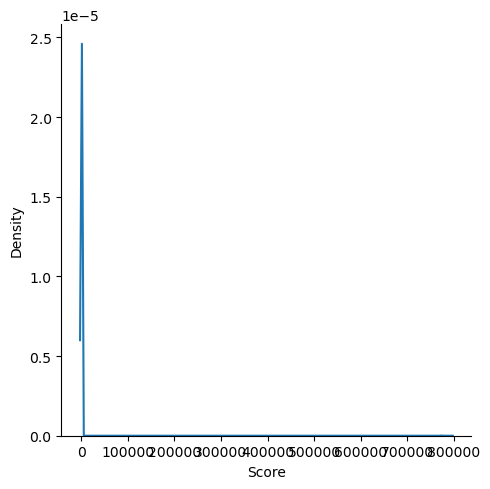

In [ ]:
sns.displot(protein, x="Score", kind="kde")
plt.show()

In [ ]:
protein.value_counts("Score")

Score
0.000000         24708
1.000000           189
25.000000           45
30.000000           43
20.000000           37
                 ...  
0.935306             1
0.935295             1
0.935285             1
0.935174             1
795111.000000        1
Length: 9072, dtype: int64

In [ ]:
g_dis=nx.get_node_attributes(G,'entrezID')


indA = [v for k,v in g_dis.items() if v in pp.loc[:,"Entrez Gene Interactor A"].tolist()]
indB = [v for k,v in g_dis.items() if v in pp.loc[:,"Entrez Gene Interactor B"].tolist()]

part1 = pp.set_index("Entrez Gene Interactor A").loc[indA,:].reset_index()
part2 = pp.set_index("Entrez Gene Interactor B").loc[indB,:].reset_index()
protein = part1.append(part2)
protein["index"] = list(range(len(protein)+1,  len(protein)*2+1,1))
PRO = pd.concat([protein.loc[:,["Official Symbol Interactor A","Entrez Gene Interactor A"]].rename(columns={"Official Symbol Interactor A": "Official Symbol Interactor", 
                                                                                          "Entrez Gene Interactor A": "Entrez Gene Interactor"}), protein.loc[:,["Official Symbol Interactor B","Entrez Gene Interactor B", "index"]].set_index("index").rename(columns={"Official Symbol Interactor B": "Official Symbol Interactor", 
                                                                                          "Entrez Gene Interactor B": "Entrez Gene Interactor"})]
               ).drop_duplicates(subset=['Entrez Gene Interactor'])


G.add_nodes_from([(r[1]["Official Symbol Interactor"],
                                      {"color": "blue",
                                       "shape": "o",
                                       "entrezID": r[1]["Entrez Gene Interactor"]}) for r in PRO.iterrows() if r[1]["Entrez Gene Interactor"] not in list(g_dis.values())])

print(len(G.edges()))

for r in protein.iterrows():
    if (r[1]["Entrez Gene Interactor A"], r[1]["Entrez Gene Interactor B"]) not in list(nx.edges(G)):
        G.add_edges_from([(r[1]["Official Symbol Interactor A"], r[1]["Official Symbol Interactor B"])])

print(len(G.edges()))


334


In [ ]:
len(G)

In [ ]:
protein.merge(PRO, how="inner", left_on="Entrez Gene Interactor B", right_on="Entrez Gene Interactor")

,Entrez Gene Interactor A,#BioGRID Interaction ID,Entrez Gene Interactor B,BioGRID ID Interactor A,BioGRID ID Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,...,Ontology Term Names,Ontology Term Categories,Ontology Term Qualifier IDs,Ontology Term Qualifier Names,Ontology Term Types,Organism Name Interactor A,Organism Name Interactor B,index,Official Symbol Interactor,Entrez Gene Interactor
0,1232,287090,2268,107637,108559,-,RP1-159A19.2,CCR3,FGR,CC-CKR-3|CD193|CKR3|CMKBR3,...,-,-,-,-,-,Homo sapiens,Homo sapiens,35053,FGR,2268
1,23586,2954748,2268,117121,108559,RP11-334P12.2,RP1-159A19.2,DDX58,FGR,RIG-I|RIGI|RLR-1,...,-,-,-,-,-,Homo sapiens,Homo sapiens,42150,FGR,2268
2,3059,287202,2268,109309,108559,-,RP1-159A19.2,HCLS1,FGR,CTTNL|HS1|lckBP1|p75,...,-,-,-,-,-,Homo sapiens,Homo sapiens,46587,FGR,2268
3,5747,287572,2268,111719,108559,-,RP1-159A19.2,PTK2,FGR,FADK|FAK|FAK1|FRNK|PPP1R71|p125FAK|pp125FAK,...,-,-,-,-,-,Homo sapiens,Homo sapiens,48248,FGR,2268
4,1232,287091,3055,107637,109305,-,RP5-836N17.3,CCR3,HCK,CC-CKR-3|CD193|CKR3|CMKBR3,...,-,-,-,-,-,Homo sapiens,Homo sapiens,35054,HCK,3055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35047,4849,3152556,10766,110911,115985,XXbac-BCX105G6.1,CTA-223H9.7,CNOT3,TOB2,LENG2|NOT3|NOT3H,...,-,-,-,-,-,Homo sapiens,Homo sapiens,70053,TOB2,10766
35048,55571,3192642,10766,120724,115985,C40,CTA-223H9.7,CNOT11,TOB2,C2orf29,...,-,-,-,-,-,Homo sapiens,Homo sapiens,70054,TOB2,10766
35049,1956,833562,116449,108276,125512,-,-,EGFR,CLNK,ERBB|ERBB1|HER1|NISBD2|PIG61|mENA,...,-,-,-,-,-,Homo sapiens,Homo sapiens,70102,CLNK,116449
35050,2064,833563,116449,108376,125512,-,-,ERBB2,CLNK,CD340|HER-2|HER-2/neu|HER2|MLN 19|NEU|NGL|TKR1,...,-,-,-,-,-,Homo sapiens,Homo sapiens,70103,CLNK,116449


In [ ]:
len(G)

9382

In [ ]:
pp.loc[:,pp.columns[10:37]].head()

,Synonyms Interactor B,Experimental System,Experimental System Type,Author,Publication Source,Organism ID Interactor A,Organism ID Interactor B,Throughput,Score,Modification,...,TREMBL Accessions Interactor B,REFSEQ Accessions Interactor B,Ontology Term IDs,Ontology Term Names,Ontology Term Categories,Ontology Term Qualifier IDs,Ontology Term Qualifier Names,Ontology Term Types,Organism Name Interactor A,Organism Name Interactor B
0,ABP-280|ABP280A|ABPA|ABPL|FLN2|MFM5|MPD4,Two-hybrid,physical,Marti A (1997),PUBMED:9006895,9606,9606,Low Throughput,-,-,...,Q59H94,NP_001120959|NP_001449,-,-,-,-,-,-,Homo sapiens,Homo sapiens
1,CMD1AA,Two-hybrid,physical,Bang ML (2001),PUBMED:11309420,9606,9606,Low Throughput,-,-,...,Q59FD9|F6THM6,NP_001094|NP_001265272|NP_001265273,-,-,-,-,-,-,Homo sapiens,Homo sapiens
2,FPTA|PGGT1A|PTAR2,Two-hybrid,physical,Wang T (1996),PUBMED:8599089,9606,9606,Low Throughput,-,-,...,-,NP_002018,-,-,-,-,-,-,Homo sapiens,Homo sapiens
3,MYL|PP8675|RNF71|TRIM19,Two-hybrid,physical,Tsuzuki S (2000),PUBMED:10938104,9606,9606,Low Throughput,-,-,...,-,NP_150250|NP_150253|NP_150252|NP_150247|NP_150...,-,-,-,-,-,-,Homo sapiens,Homo sapiens
4,ADMIO|APRF|HIES,Two-hybrid,physical,Kim J (2000),PUBMED:10875894,9606,9606,Low Throughput,-,-,...,-,NP_644805|NP_003141|NP_001356447|NP_001356443|...,-,-,-,-,-,-,Homo sapiens,Homo sapiens


In [ ]:
pp.value_counts("Experimental System")

Experimental System
Affinity Capture-MS              481856
Two-hybrid                       111672
Proximity Label-MS                92079
Affinity Capture-Western          71985
Co-fractionation                  45665
Reconstituted Complex             37881
Affinity Capture-RNA              16322
Biochemical Activity              12740
Protein-RNA                        7099
Co-localization                    4112
Affinity Capture-Luminescence      2410
FRET                               2255
Protein-peptide                    2124
Co-crystal Structure               1802
Co-purification                    1787
PCA                                1096
Far Western                         759
dtype: int64

In [ ]:
pp.columns

Index(['#BioGRID Interaction ID', 'Entrez Gene Interactor A',
       'Entrez Gene Interactor B', 'BioGRID ID Interactor A',
       'BioGRID ID Interactor B', 'Systematic Name Interactor A',
       'Systematic Name Interactor B', 'Official Symbol Interactor A',
       'Official Symbol Interactor B', 'Synonyms Interactor A',
       'Synonyms Interactor B', 'Experimental System',
       'Experimental System Type', 'Author', 'Publication Source',
       'Organism ID Interactor A', 'Organism ID Interactor B', 'Throughput',
       'Score', 'Modification', 'Qualifications', 'Tags', 'Source Database',
       'SWISS-PROT Accessions Interactor A', 'TREMBL Accessions Interactor A',
       'REFSEQ Accessions Interactor A', 'SWISS-PROT Accessions Interactor B',
       'TREMBL Accessions Interactor B', 'REFSEQ Accessions Interactor B',
       'Ontology Term IDs', 'Ontology Term Names', 'Ontology Term Categories',
       'Ontology Term Qualifier IDs', 'Ontology Term Qualifier Names',
       'Ontology

In [ ]:
pp.value_counts("Entrez Gene Interactor B")

Entrez Gene Interactor B
351       2105
7157      1643
7316      1142
3312      1053
4193       961
          ... 
5314         1
5313         1
1068         1
401720       1
79924        1
Length: 31691, dtype: int64

In [ ]:
test = pd.read_excel("data/UniversityOfMichingan/Milestone_II/dat/41467_2021_21770_MOESM5_ESM.xlsx")

/home/brunosa3/.conda/envs/michigan/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  """Entry point for launching an IPython kernel.


In [ ]:
test.shape

(387626, 6)

In [ ]:
test2 = pd.merge(pp, test,  how='inner', left_on=["Entrez Gene Interactor A","Entrez Gene Interactor B"], right_on = ["node_1","node_2"])

In [ ]:
test2.value_counts("SWISS-PROT Accessions Interactor B")

SWISS-PROT Accessions Interactor B
-         2393
Q00987     565
Q13547     337
Q7Z3S9     320
P0CG48     311
          ... 
Q15080       1
Q8TAC1       1
Q15113       1
Q15124       1
Q9Y6Z7       1
Length: 14030, dtype: int64

In [ ]:
pp.shape

(893644, 37)